# Neural Networks with Keras

In [2]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

# pip install keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.cross_validation as cv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)

## Neural Network Regression

### Polynomial Regression

Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

In [5]:
# Create some data

def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


In [3]:
# Define a Feed Forward NN
model = Sequential()
model.add(Dense(input_dim=1, output_dim=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, output_dim=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [6]:
# Train the model
print('Training...')
loss = model.fit(X, y, nb_epoch=500, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print("Done")

Training...
0.0854882331689
Done


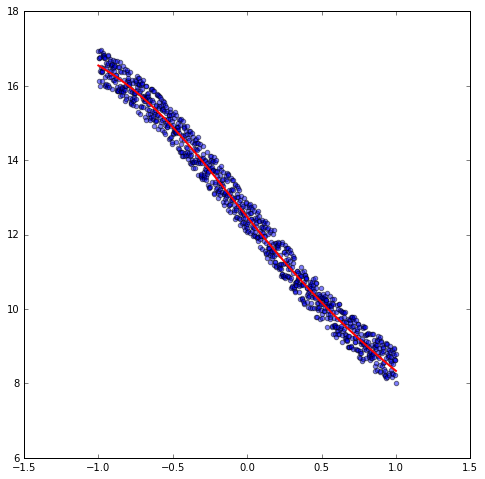

MSE 0.0855282084513


In [7]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions, color='r', linewidth=2)
plt.show()
print("MSE", mean_squared_error(predictions, y))

### Sine Regression

In [9]:
# Sine data
X = np.linspace(0, 2 * np.pi, 500).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

(500, 1) (500, 1)


In [10]:
# Create the model
model = Sequential()
model.add(Dense(input_dim=1, output_dim=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, output_dim=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.1))

### Train the Model

In [11]:
print('Training..')
loss = model.fit(X, y, nb_epoch=150, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

Training..
0.0126229299853
Complete


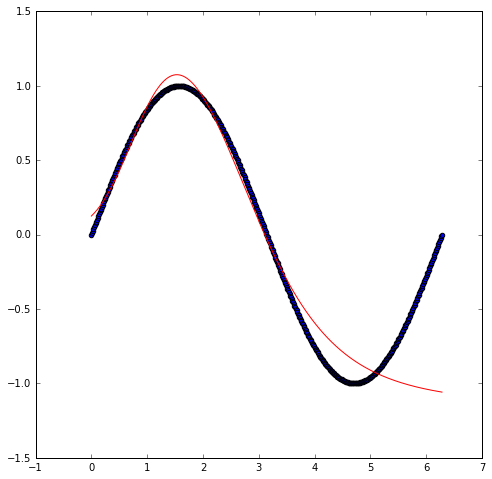

MSE 0.0693315698424


In [12]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

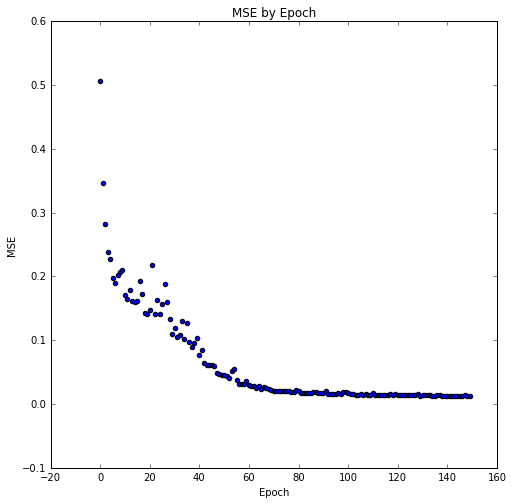

In [13]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])

# plt.scatter(range(len(loss.history['val_loss'])), loss.history['val_loss'], color='red')

plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.title('MSE by Epoch')

### Train longer

If we train for more epochs, we can get a better regression.

(1000, 1) (1000, 1)
Training..
0.00057795047718
Complete


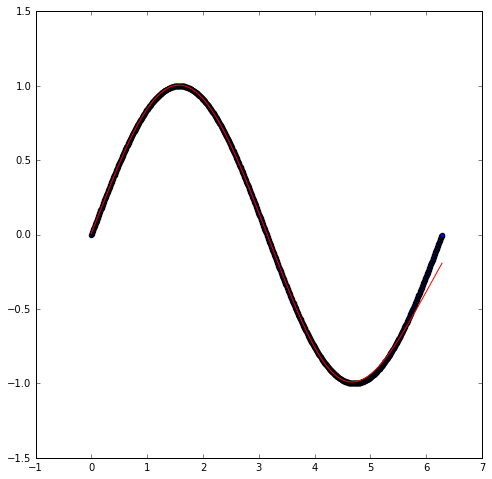

MSE 0.00133023607819


In [12]:
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

model = Sequential()
model.add(Dense(input_dim=1, output_dim=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, output_dim=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.05))

print('Training..')
loss = model.fit(X, y, nb_epoch=15000, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

We can take a closer look at the error per training epoch.

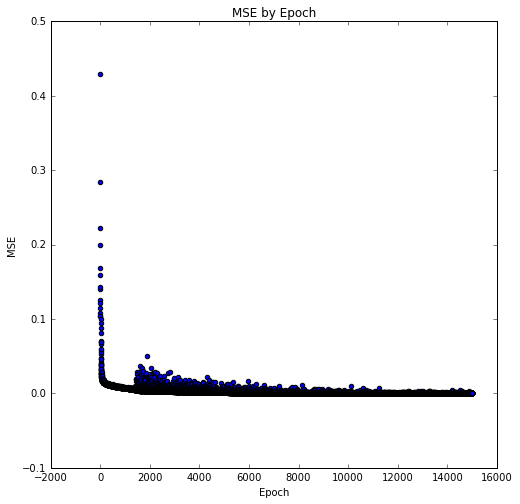

In [13]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

In [14]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


Training..
0.0916458962692
Complete


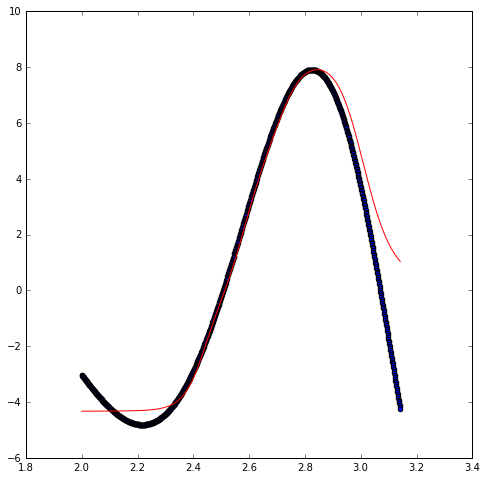

MSE 1.28391965568


In [15]:
## Solution

model = Sequential()
model.add(Dense(input_dim=1, output_dim=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, output_dim=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, output_dim=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.005))

print('Training..')
loss = model.fit(X, y, nb_epoch=10000, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

## Classification

We'll start with the Iris dataset (of course).

In [14]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(150, 4) (150, 3)


In [16]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=4, output_dim=4))
model.add(Activation("tanh"))

model.add(Dense(input_dim=4, output_dim=4))
model.add(Activation("tanh"))


# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=4, output_dim=3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [17]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, nb_epoch=5000, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
0.0117153188358
Training complete


In [18]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

ACCURACY:  0.993333333333
CONFUSION MATRIX:
 [[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


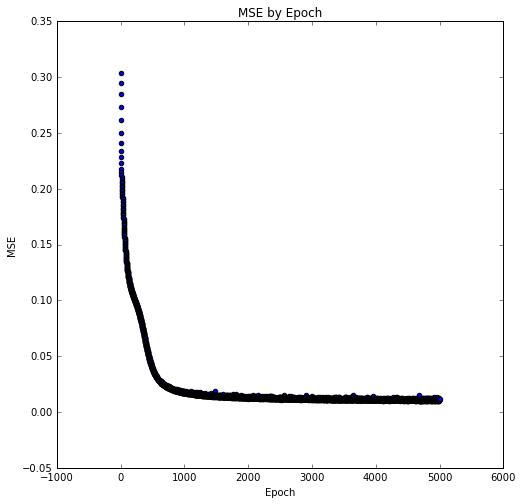

In [19]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Abalone data set

In [20]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("abalone.data", names=columns)

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


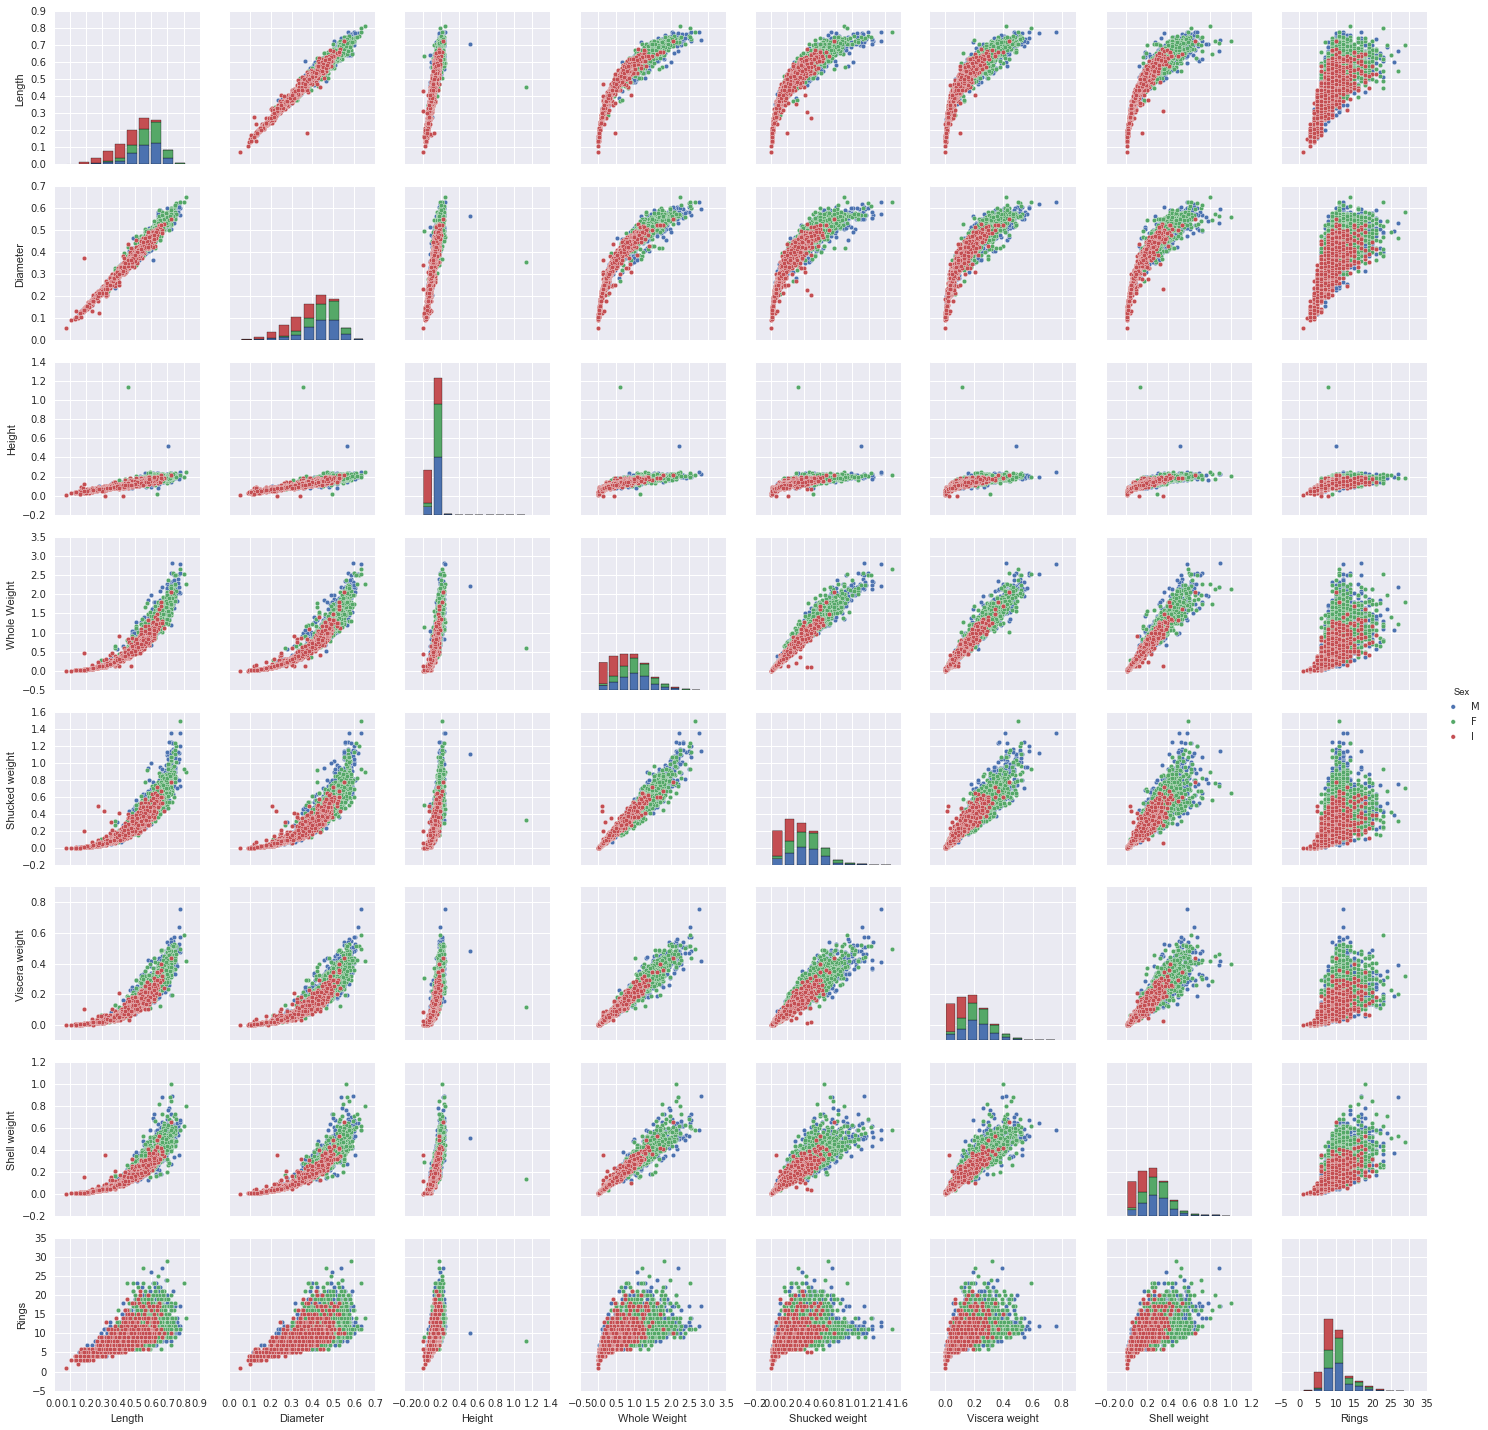

In [22]:
import seaborn as sns
sns.pairplot(data=df, vars=columns[1:], hue="Sex")
plt.show()

In [21]:
d = {'M': 0, 'F': 1, 'I': 2}
df["Sex"] = df["Sex"].apply(lambda x: d[x])

In [22]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(4177, 8) (4177, 3)


In [23]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=8, output_dim=6))
model.add(Activation("tanh"))

model.add(Dense(input_dim=6, output_dim=6))
model.add(Activation("tanh"))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=6, output_dim=3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [24]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, nb_epoch=1000, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
0.173071733933
Training complete


ACCURACY:  0.545846301173
CONFUSION MATRIX:
 [[1155   72  301]
 [1031   80  196]
 [ 275   22 1045]]


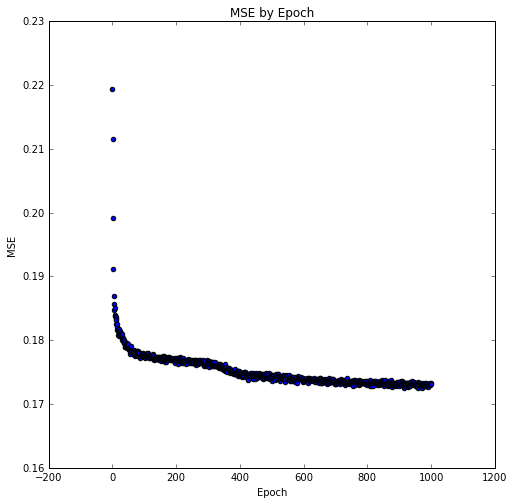

In [25]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Exercise

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You'll need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [28]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("magic04.data", names=names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [29]:
d = {'g': 0, 'h': 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [30]:
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(19020, 10) (19020, 2)


In [31]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=10, output_dim=6))
model.add(Activation("tanh"))

model.add(Dense(input_dim=6, output_dim=6))
model.add(Activation("tanh"))


# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=6, output_dim=2))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [32]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.2, nb_epoch=1000, 
                 batch_size=256, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
0.108597032569
Training complete


ACCURACY:  0.799158780231
CONFUSION MATRIX:
 [[11670   662]
 [ 3158  3530]]


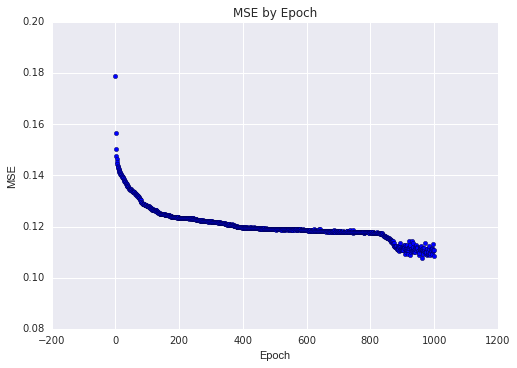

In [33]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')